In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Video

Seleccionar almacenamiento

In [6]:
#Seleccionar Google Drive
from google.colab import drive
drive.mount('/content/drive')
source = r'/content/drive/Shareddrives/Proyecto TM' #con drive
video_temporal = r'/content/temp_video.mp4'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Seleccionar Local
source =  r'U:/Unidades compartidas/Proyecto TM' #local
video_temporal = source + r'/temporal/temp_video.mp4'


In [7]:
#Rutas
src_dataset = source + r'/Notebooks/datasets/dataset_tm_full.csv'
src_videos = source + r'/Videos TM'

In [8]:
df = pd.read_csv(src_dataset)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nombre       1800 non-null   object 
 1   evasion      1800 non-null   object 
 2   categoria    1800 non-null   object 
 3   cantidad     1800 non-null   int64  
 4   complejo     1800 non-null   object 
 5   duracion     1800 non-null   float64
 6   orientacion  1800 non-null   object 
 7   estacion     1800 non-null   object 
 8   fecha        1300 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 126.7+ KB


In [9]:
df.head(100)

,nombre,evasion,categoria,cantidad,complejo,duracion,orientacion,estacion,fecha
0,Ch2_20181118181010-09.mkv,SI,CASO_1,11,NO,21.0,BACK,NIEVES,2018-11-18 18:10:10
1,Ch2_20181118181010-10.mkv,SI,CASO_1,5,NO,21.0,BACK,NIEVES,2018-11-18 18:10:10
2,Ch2_20181118181010-11.mkv,SI,CASO_1,3,NO,20.0,BACK,NIEVES,2018-11-18 18:10:10
3,Ch2_20181118181010-12.mkv,SI,CASO_1,3,NO,20.0,BACK,NIEVES,2018-11-18 18:10:10
4,Ch2_20181118181010-13.mkv,SI,CASO_1,1,NO,21.0,BACK,NIEVES,2018-11-18 18:10:10
...,...,...,...,...,...,...,...,...,...
95,Ch1_20181019173335-01.mkv,SI,CASO_1,1,NO,21.0,BACK,POLICARPA,2018-10-19 17:33:35
96,Ch1_20181019180935-00.mkv,SI,CASO_1,1,NO,21.0,BACK,POLICARPA,2018-10-19 18:09:35
97,Ch1_20181020112301-00.mkv,SI,CASO_1,1,NO,21.0,BACK,POLICARPA,2018-10-20 11:23:01
98,Ch1_20181022063425-00.mkv,SI,CASO_1,1,NO,20.0,BACK,POLICARPA,2018-10-22 06:34:25


In [10]:
top_50 = df[df['evasion'] == 'SI'].sort_values('cantidad', ascending=False).head(50)
top_50[['nombre', 'cantidad', 'estacion', 'complejo', 'fecha']]

,nombre,cantidad,estacion,complejo,fecha
1645,Ch1_20181120194059-04.mkv,16,NIEVES,YES,2018-11-20 19:40:59
1640,Ch1_20181120192300-14.mkv,12,NIEVES,NO,2018-11-20 19:23:00
0,Ch2_20181118181010-09.mkv,11,NIEVES,NO,2018-11-18 18:10:10
1625,Ch1_20181120190501-16.mkv,11,NIEVES,NO,2018-11-20 19:05:01
1621,Ch1_20181120190501-12.mkv,10,NIEVES,YES,2018-11-20 19:05:01
1618,Ch1_20181120190501-09.mkv,10,NIEVES,YES,2018-11-20 19:05:01
1467,Ch1_20181118132058-00.mkv,10,NIEVES,YES,2018-11-18 13:20:58
1605,Ch1_20181120184700-05.mkv,10,NIEVES,NO,2018-11-20 18:47:00
1726,Ch2_20181118160343-04.mkv,9,NIEVES,NO,2018-11-18 16:03:43
19,Ch2_20181118182809-12.mkv,9,NIEVES,NO,2018-11-18 18:28:09


In [ ]:
def reproducir_video(filename, width=900, height=700):
    # Ruta completa
    file_path = os.path.join(src_videos, filename)

    if not os.path.exists(file_path):
        print(f"El archivo {filename} no existe en {file_path}")
        return

    # Si es MKV, convertir a MP4 en carpeta temporal
    if filename.endswith(".mkv"):
        if os.path.exists(video_temporal):
            os.remove(video_temporal)
        os.system(f'ffmpeg -i "{file_path}" -c copy "{video_temporal}"')
        file_path = video_temporal

    # Reproducir
    return Video(file_path, embed=True, width=width, height=height)

In [ ]:
# Reproducir video
# @title Texto de título predeterminado
nombre_video = "Ch1_20181120194059-04.mkv" # @param {"type":"string","placeholder":"Inserta el nombre del video a reproducir"}

#mostar metadatos en consola
video_data = df[df['nombre'] == nombre_video]
print('nombre :  ' + str(video_data['nombre'].values[0]))
print('evasion :  ' + str(video_data['evasion'].values[0]))
print('categoria :  ' + str(video_data['categoria'].values[0]))
print('cantidad :  ' + str(video_data['cantidad'].values[0]))
print('complejo :  ' + str(video_data['complejo'].values[0]))
print('duracion :  ' + str(video_data['duracion'].values[0]))
print('orientacion :  ' + str(video_data['orientacion'].values[0]))
print('estacion :  ' + str(video_data['estacion'].values[0]))
print('fecha :  ' + str(video_data['fecha'].values[0]))

#reproducir
reproducir_video(nombre_video)


Output hidden; open in https://colab.research.google.com to view.

-------

In [11]:
# Configuración general de las gráficas
plt.style.use("default")
plt.rcParams["figure.figsize"] = (8,5)
plt.style.use("seaborn-v0_8-muted")

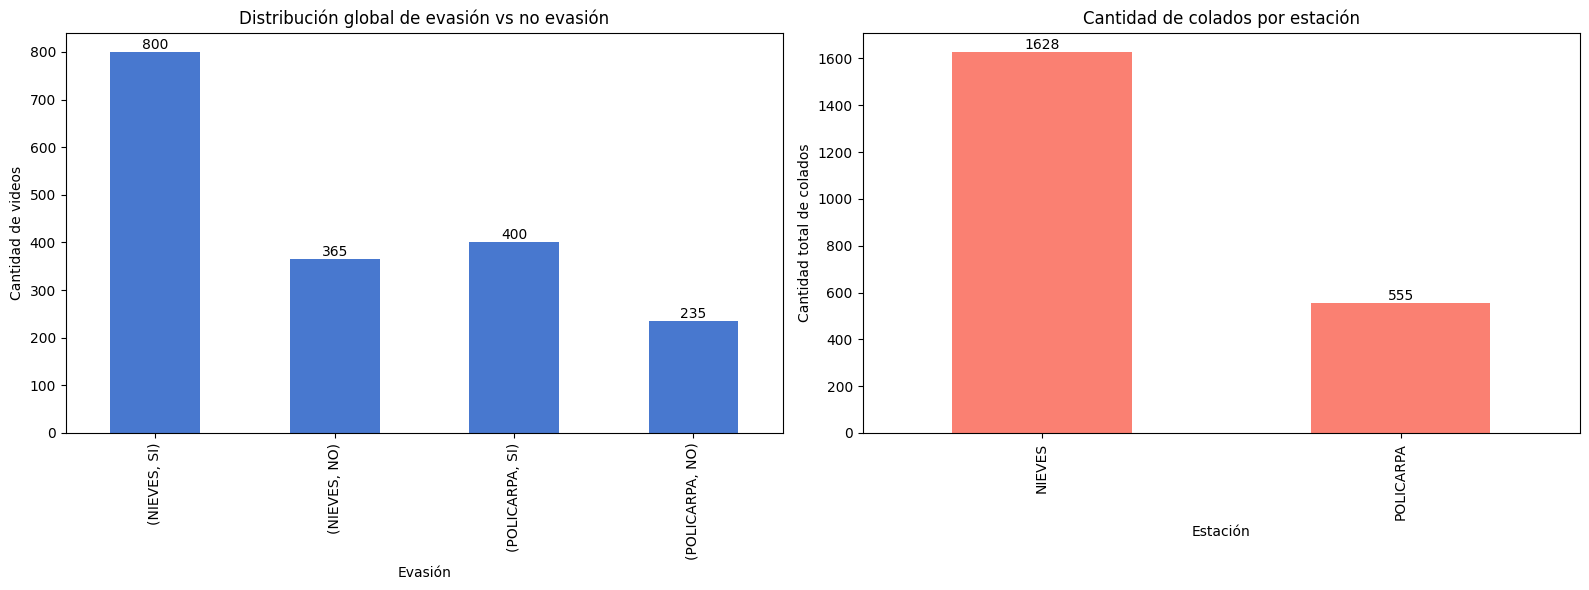

In [ ]:
plt.style.use("seaborn-v0_8-muted")

# Setear dos columnas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ------------------------------- Evasión y no evasión por estación -------------------------------
df.groupby("estacion")["evasion"].value_counts().plot(kind="bar", ax=ax1)
ax1.set_title("Distribución global de evasión vs no evasión")
ax1.set_xlabel("Evasión")
ax1.set_ylabel("Cantidad de videos")

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# -------------------------------  Cantidad de colados por estación -------------------------------
df.groupby("estacion")["cantidad"].sum().plot(kind="bar", ax=ax2, color="salmon")
ax2.set_title("Cantidad de colados por estación")
ax2.set_xlabel("Estación")
ax2.set_ylabel("Cantidad total de colados")

for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

------

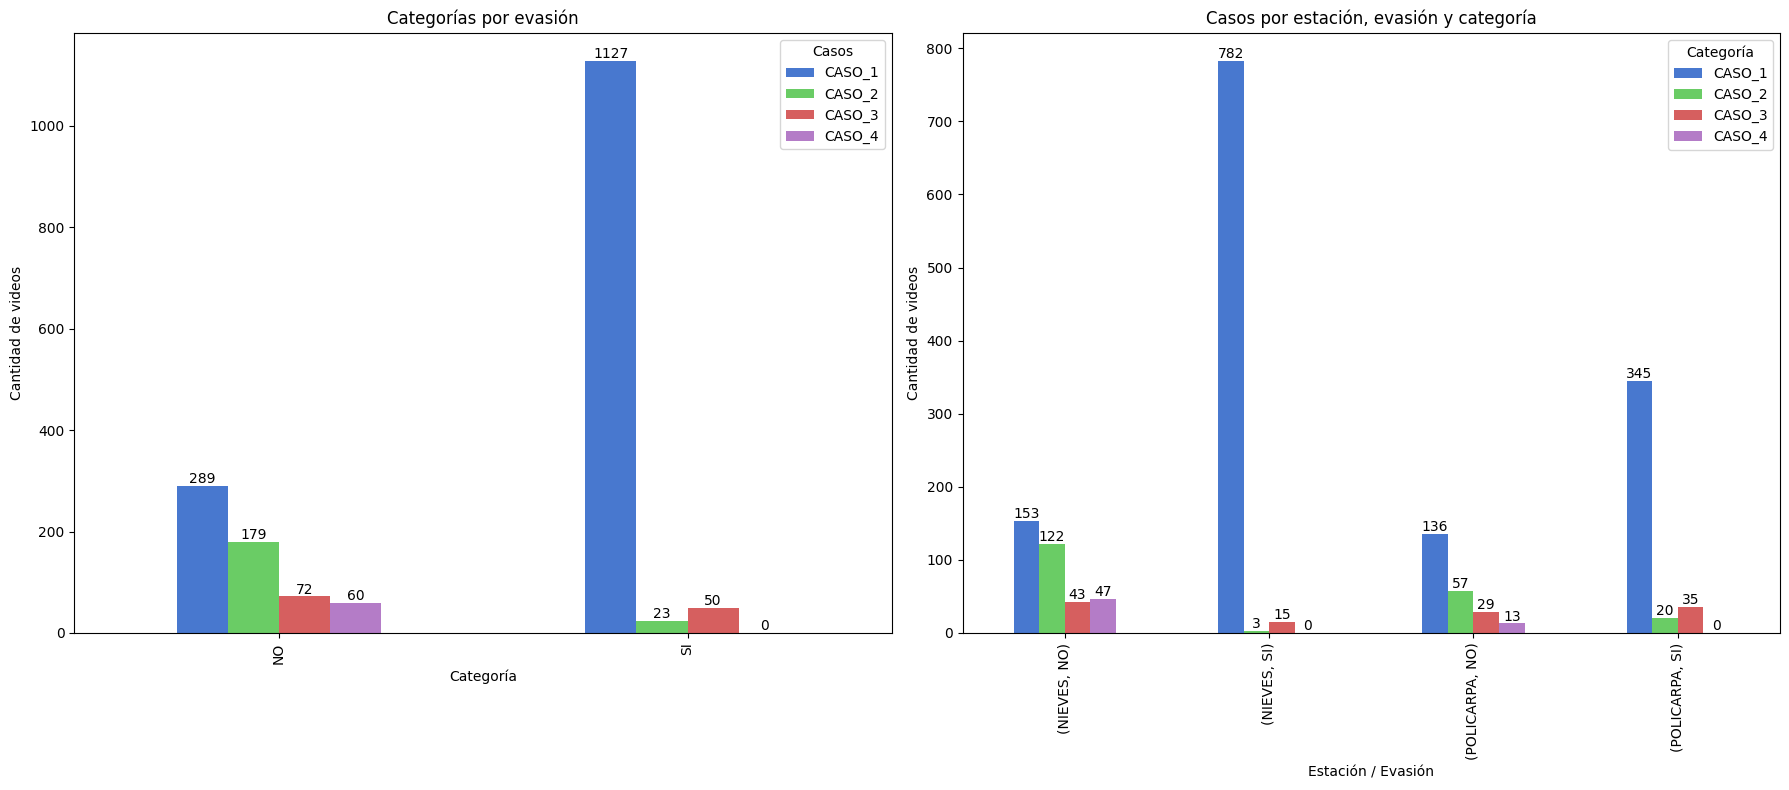

In [ ]:
#Cantidad de categorías por estación y evasión
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# ------------------------------- Categorías por evasión -------------------------------
pd.crosstab(df["evasion"], df["categoria"]).plot(kind="bar", stacked=False, ax=ax1)

ax1.set_title("Categorías por evasión")
ax1.set_xlabel("Categoría")
ax1.set_ylabel("Cantidad de videos")

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

ax1.legend(title="Casos")

# ------------------------------- Casos por estación, evasión y categoría -------------------------------
df_grouped = df.groupby(["estacion", "evasion", "categoria"]).size().unstack(fill_value=0)

df_grouped.plot(kind="bar", stacked=False, ax=ax2)

ax2.set_title("Casos por estación, evasión y categoría")
ax2.set_xlabel("Estación / Evasión")
ax2.set_ylabel("Cantidad de videos")
ax2.legend(title="Categoría")

# labels en las barras
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

**EVASIÓN:**
- **CASO_1:** La persona atraviesa la calle, salta hacia la estación y entra por la puerta lateral.
- **CASO_2:** La persona aparece por el lado de la estación y entra por la puerta lateral.
- **CASO_3:** La persona aprovecha que el bus está abordando, llega por la calle, se sube a la estación,
  camina por fuera e ingresa junto con las personas que ya estaban en la estación.

**NO EVASIÓN:**
- **CASO_1:** La persona ya está en la estación e ingresa al bus.
- **CASO_2:** La persona sale de la estación por la puerta hacia la calle.
- **CASO_3:** La persona, estando en la estación, se asoma y regresa.
- **CASO_4:** La persona se mueve por el carril de TransMilenio, pero no entra a la estación (peatones o inspectores).


------

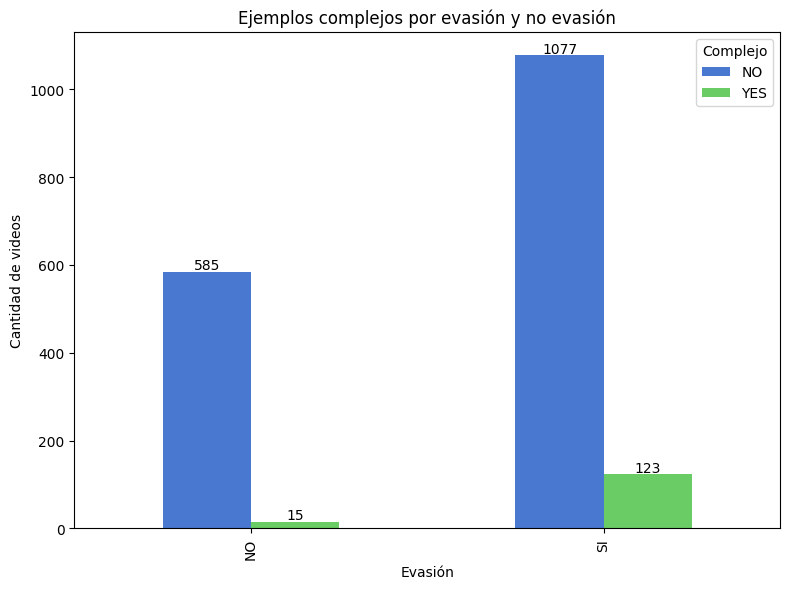

In [ ]:
# ------------------------------- Cantidad de ejemplos complejos por evasion y no evasión -------------------------------
ax = pd.crosstab(df["evasion"], df["complejo"]).plot(kind="bar", figsize=(8,6))

plt.title("Ejemplos complejos por evasión y no evasión")
plt.xlabel("Evasión")
plt.ylabel("Cantidad de videos")

# labels de las barras
for p in ax.patches:
    if p.get_height() > 0: 
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.legend(title="Complejo")
plt.tight_layout()
plt.show()

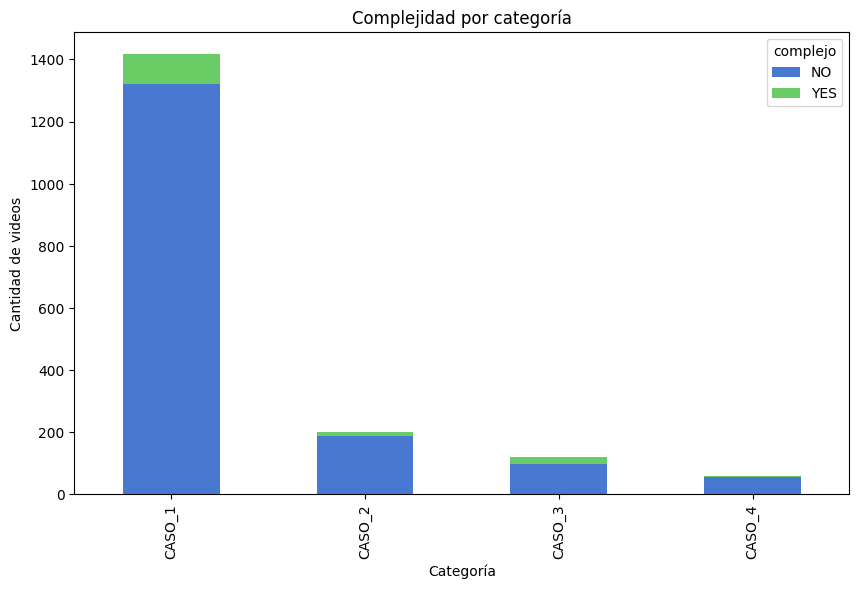

In [ ]:
# Proporción de videos complejos vs simples por categoría
ax = pd.crosstab(df["categoria"], df["complejo"]).plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Complejidad por categoría")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de videos")
plt.show()

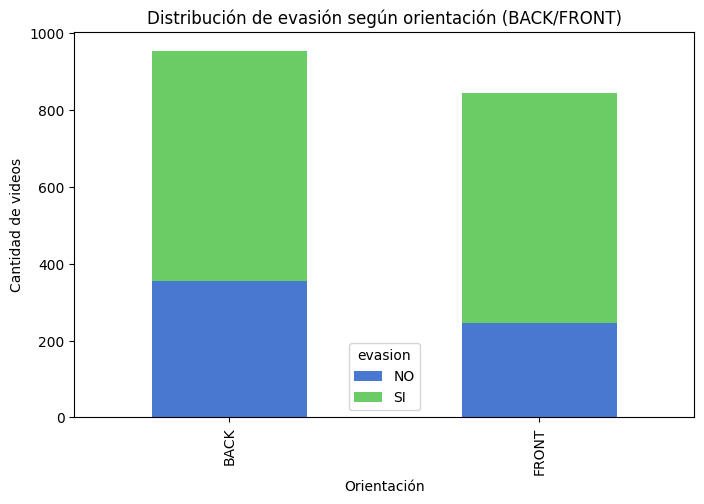

In [ ]:
# Distribución de evasión según orientación del bus
pd.crosstab(df["orientacion"], df["evasion"]).plot(kind="bar", stacked=True)
plt.title("Distribución de evasión según orientación (BACK/FRONT)")
plt.xlabel("Orientación")
plt.ylabel("Cantidad de videos")
plt.show()

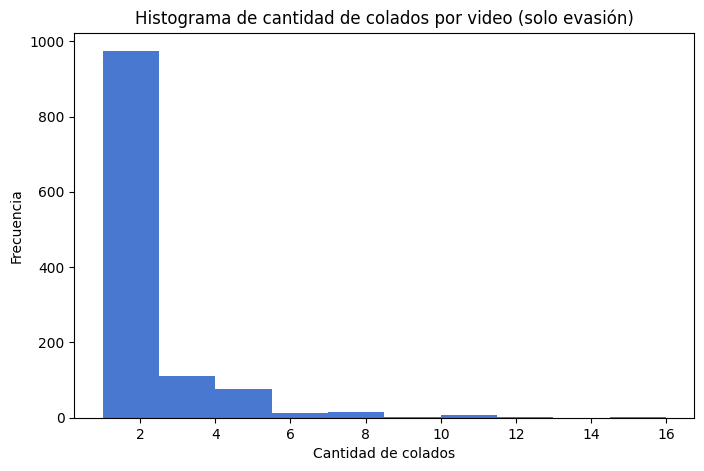

In [ ]:
# Número de colados por video
df[df["evasion"]=="SI"]["cantidad"].plot(kind="hist", bins=10)
plt.title("Histograma de cantidad de colados por video (solo evasión)")
plt.xlabel("Cantidad de colados")
plt.ylabel("Frecuencia")
plt.show()